In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.groupby('type').count()
# thinking of dropping type and date columns and probably user_id column as well

,business_id,date,review_id,stars,text,user_id,cool,useful,funny
type,,,,,,,,,
review,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
yelp['text length'] = yelp['text'].apply(len)

EDA

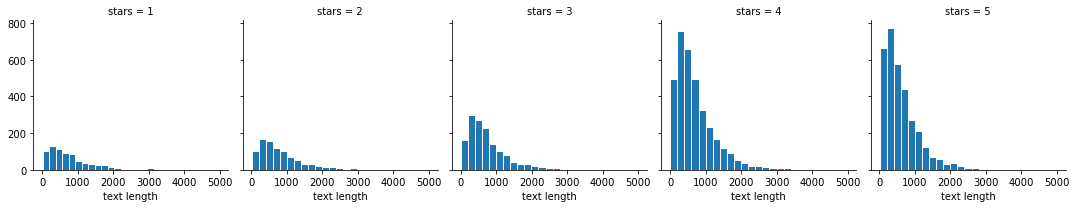

In [8]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist,'text length', edgecolor='white', bins=25)

<AxesSubplot:xlabel='stars', ylabel='text length'>

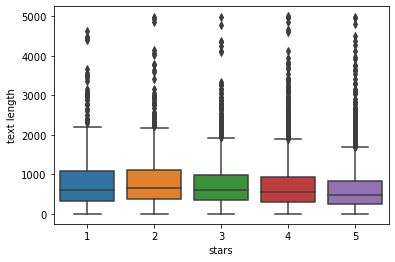

In [9]:
sns.boxplot(x='stars', y='text length', data=yelp)

<AxesSubplot:xlabel='stars', ylabel='count'>

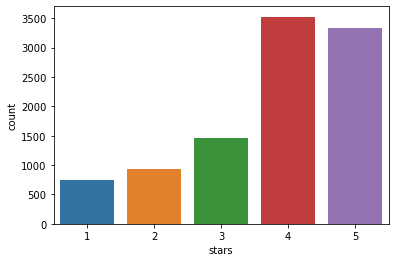

In [10]:
sns.countplot(data=yelp, x='stars')

In [11]:
stars_grouped = yelp.groupby('stars').mean()
stars_grouped

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
stars_grouped.corr()
# appears text lenght varies directly or correlate with review votes from cool to useful to funny

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

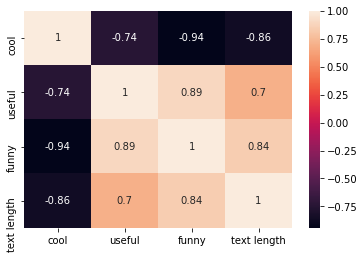

In [13]:
sns.heatmap(stars_grouped.corr(), annot=True)

NLP classification

In [14]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow_transformer = CountVectorizer()

In [18]:
X = bow_transformer.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
nb = MultinomialNB()

In [23]:
nb.fit(X_train, y_train)

MultinomialNB()

In [24]:
predict = nb.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[ 163   98]
 [  32 1056]]


              precision    recall  f1-score   support

           1       0.84      0.62      0.71       261
           5       0.92      0.97      0.94      1088

    accuracy                           0.90      1349
   macro avg       0.88      0.80      0.83      1349
weighted avg       0.90      0.90      0.90      1349



In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline = Pipeline([('bow',CountVectorizer()), ('Tfidf', TfidfTransformer()), ('model', MultinomialNB()),])

In [30]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('Tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [32]:
pipeline_pred = pipeline.predict(X_test)

In [33]:
print(confusion_matrix(y_test, pipeline_pred))
print('\n')
print(classification_report(y_test, pipeline_pred))

[[   1  260]
 [   0 1088]]


              precision    recall  f1-score   support

           1       1.00      0.00      0.01       261
           5       0.81      1.00      0.89      1088

    accuracy                           0.81      1349
   macro avg       0.90      0.50      0.45      1349
weighted avg       0.84      0.81      0.72      1349



In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
pipeline_1 = Pipeline([('bow',CountVectorizer()), ('Tfidf', TfidfTransformer()), ('model', RandomForestClassifier()),])

In [36]:
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('Tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier())])

In [37]:
rf_pred = pipeline_1.predict(X_test)

In [38]:
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred))

[[  35  226]
 [   2 1086]]


              precision    recall  f1-score   support

           1       0.95      0.13      0.23       261
           5       0.83      1.00      0.91      1088

    accuracy                           0.83      1349
   macro avg       0.89      0.57      0.57      1349
weighted avg       0.85      0.83      0.78      1349

